In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
%matplotlib inline
import matplotlib
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Read images.
imagefiles = glob.glob('./scene/*')
imagefiles.sort()
print(imagefiles)

images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

num_images = len(images)

['./scene\\scene1.jpg', './scene\\scene2.jpg', './scene\\scene3.jpg', './scene\\scene4.jpg', './scene\\scene5.jpg', './scene\\scene6.jpg', './scene\\scene7.jpg', './scene\\scene8.jpg']


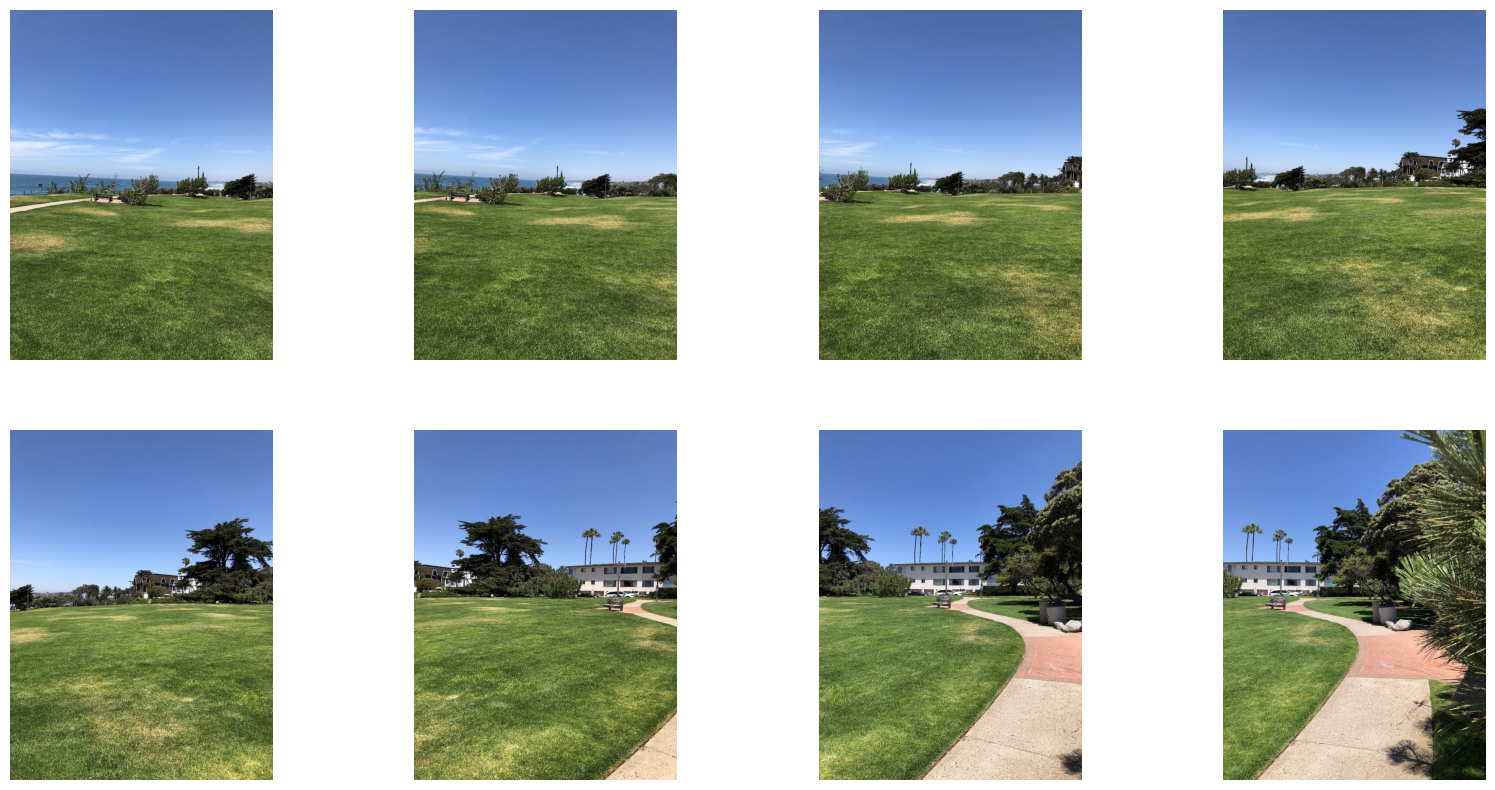

In [3]:
# Display images.
plt.figure(figsize = [20,10]) 
num_cols = 4
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1) 
    plt.axis('off')
    plt.imshow(images[i]);

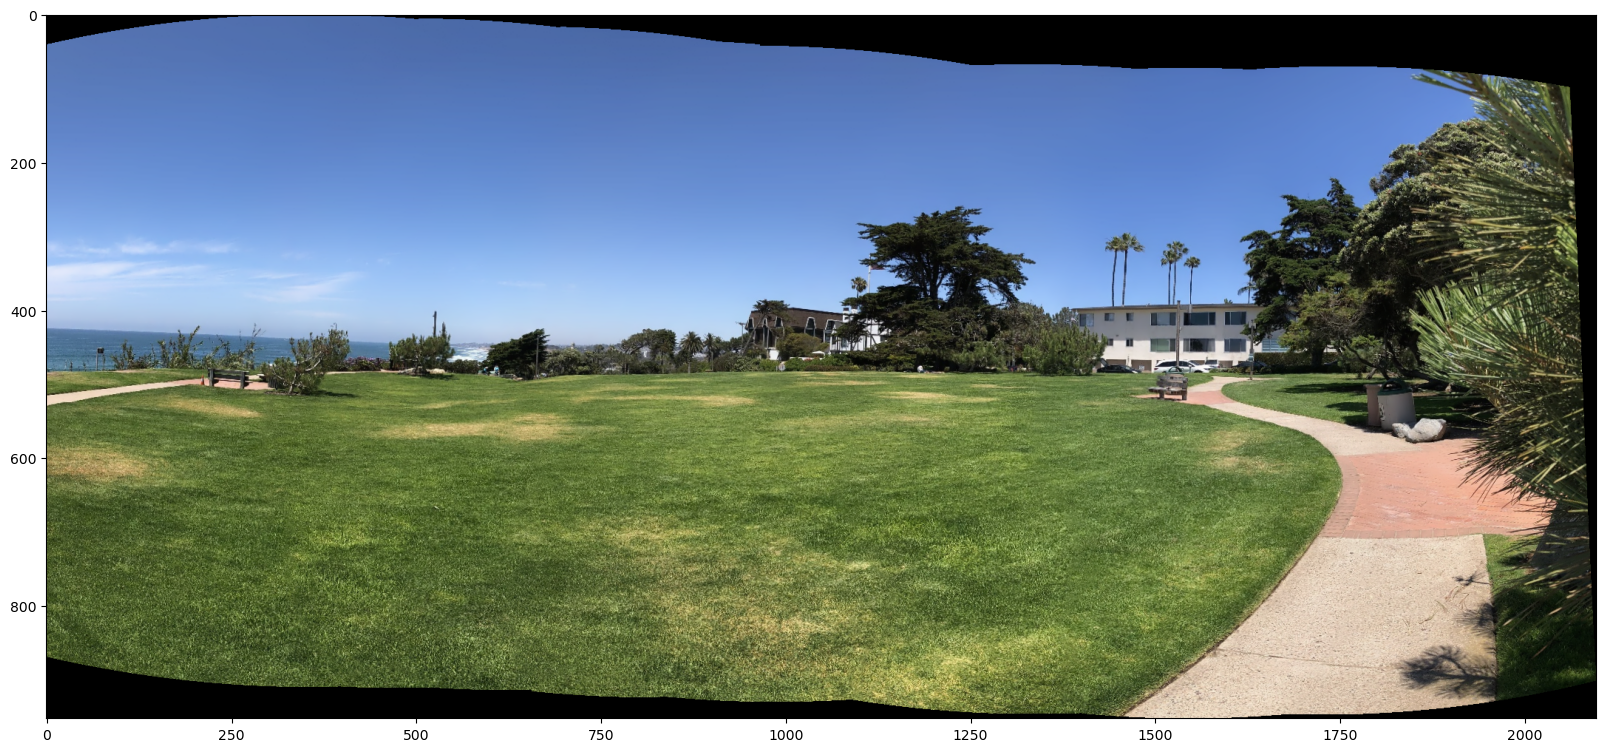

In [4]:
stitcher = cv2.Stitcher_create()
status, panorama = stitcher.stitch(images)
if status == 0:
    plt.figure(figsize = [20,10]) 
    plt.imshow(panorama)

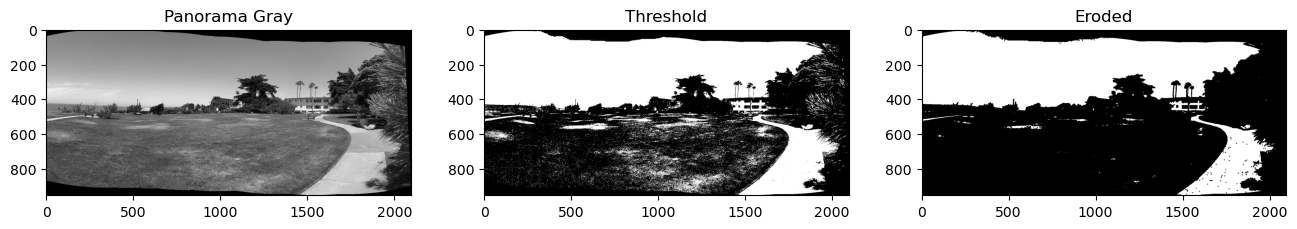

(952, 2097, 3)

In [32]:
panorama_gray = cv2.cvtColor(panorama, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(panorama_gray, 125, 255, cv2.THRESH_BINARY)

eroded = cv2.erode(thresh, np.ones((5,5), np.uint8))
plt.figure(figsize = [16, 10])
plt.subplot(131); plt.imshow(panorama_gray); plt.title("Panorama Gray")
plt.subplot(132); plt.imshow(thresh); plt.title("Threshold")
plt.subplot(133); plt.imshow(eroded); plt.title("Eroded")
plt.show()

thresh = eroded
panorama.shape

In [33]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# Number of contours.
print("Number of contours found = {}".format(len(contours)))

# Hierarchy.
print("\nHierarchy : \n{}".format(hierarchy))

Number of contours found = 295

Hierarchy : 
[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  ...
  [293 291  -1  -1]
  [294 292  -1  -1]
  [ -1 293  -1  -1]]]


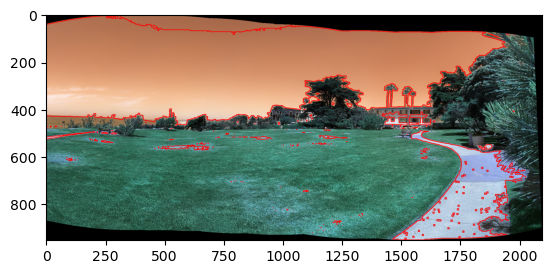

In [34]:
panorama_copy = panorama.copy()

cv2.drawContours(panorama_copy, contours, -1, (0, 0, 255), 2)
plt.imshow(panorama_copy[:,:,::-1]);
plt.show()

x coordinate = 0
y coordinate = 3
width = 1943
height = 466


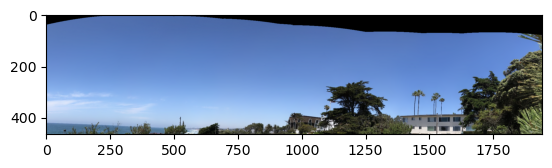

: 

In [35]:
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)
cropped_image = panorama[y:y+h, x:x+w]

plt.imshow(cropped_image);
print(f"x coordinate = {x}")
print(f"y coordinate = {y}")
print(f"width = {w}")
print(f"height = {h}")
